#### Objective for IVSCC Manuscript Graphs

In [1]:
"""
Lockdown Date: 190830 for all graphs
nucleus_present vs nucleus_absent data:
-Restrict data to before 180620
-Because we only collect nucleus present after 180620
-MET data only

Nucleus_present analysis:
-present vs. absent

Comparion of present vs. absent with:
-cDNA quantity (picogreen yield)
-cDNA quality (%>400 bp)
-Tree call(core, I1, I2, I3 and PoorQ)
-# of genes
-amplified content
"""

'\nLockdown Date: 190830 for all graphs\nnucleus_present vs nucleus_absent data:\n-Restrict data to before 180620\n-Because we only collect nucleus present after 180620\n-MET data only\n\nNucleus_present analysis:\n-present vs. absent\n\nComparion of present vs. absent with:\n-cDNA quantity (picogreen yield)\n-cDNA quality (%>400 bp)\n-Tree call(core, I1, I2, I3 and PoorQ)\n-# of genes\n-amplified content\n'

#### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

#### Path variables

In [4]:
csv_path = "C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/csvs/"
graph_path = "C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/graphs/"
excel_path = "C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/excel_sheets/"

#### Read Shiny mouse

In [5]:
shinym_df = pd.read_csv("//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv")

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#for n in shinym_df.columns:
#    print n

In [7]:
shinym_col_list = ["sample_id",
                   "Data",
                   "postPatch",
                   "percent_cdna_longer_than_400bp",
                   "amplified_quantity_ng",
                   "Genes.Detected.CPM", #Same one Kristen used
                   "Tree_call"]
##"Genes.With.CPM", "Genes.With.FPKM", "Genes.Detected", #Probably not the correct ones
shinym_df = shinym_df[shinym_col_list]
len(shinym_df)

9644

In [8]:
shinym_df.dropna(subset=["postPatch"], inplace=True) # 7 NaN samples
shinym_df["date"] = shinym_df.sample_id.str[5:11]
shinym_df.sort_values("date", inplace=True)
shinym_df.set_index("date", inplace=True)
shinym_df = shinym_df.loc[:"180620"]

In [9]:
prod_df = shinym_df[shinym_df["Data"] == "Production"]
len(prod_df)

3162

In [10]:
prod_df.postPatch.unique()

array(['Nucleated', 'Partial-Nucleus', 'No-Seal', 'Entire-Cell',
       'Outside-Out', 'nucleus_present', 'nucleus_absent', 'entire_cell'],
      dtype=object)

In [11]:
met_df = prod_df[(prod_df["postPatch"] == "nucleus_present") | (prod_df["postPatch"] == "nucleus_absent")]

In [12]:
len(met_df)

2916

In [13]:
met_df

,sample_id,Data,postPatch,percent_cdna_longer_than_400bp,amplified_quantity_ng,Genes.Detected.CPM,Tree_call
date,,,,,,,
171002,P8S4_171002_355_A01,Production,nucleus_present,0.433,20.745630,6587,I2
171002,P9S4_171002_403_A01,Production,nucleus_absent,0.334,3.784308,3064,PoorQ
171002,P9S4_171002_405_A01,Production,nucleus_absent,0.387,3.447394,2212,PoorQ
171002,P9S4_171002_404_A01,Production,nucleus_present,0.479,3.642626,3174,PoorQ
171002,P9S4_171002_406_A01,Production,nucleus_absent,0.436,4.673653,3560,PoorQ
171002,P2S4_171002_053_A01,Production,nucleus_absent,0.486,2.548507,2747,PoorQ
171002,P2S4_171002_055_A01,Production,nucleus_present,0.715,15.401426,7375,Core
171002,P8S4_171002_356_A01,Production,nucleus_present,0.672,11.645717,6965,Core
171002,P8S4_171002_354_A01,Production,nucleus_present,0.430,12.071228,5026,Core


#### Graphs

In [14]:
colors = ["#74c476", "#fb6a4a"] #TEa, VISp

def vioplt(col, col_label, df):
    plt.figure(figsize=(5, 6))
    ax=sns.violinplot(x="postPatch", y=col, data=df, scale="count", inner="quartile", 
                      linewidth=1, saturation=1, width=0.9, palette=colors)
    ax=sns.swarmplot(x="postPatch", y=col, data=df, linewidth=1, size=0.3, color="0.2")
    ax.set_xlabel("Post Patch Outcome")
    ax.set_ylabel(col_label, fontsize=16)
    #plt.savefig(graph_path + "tv_vio_" + col + ".jpeg", bbox_inches="tight")

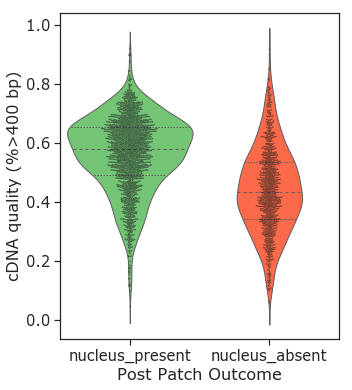

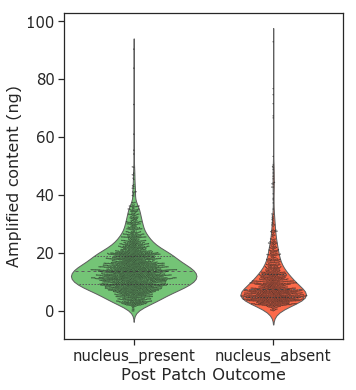

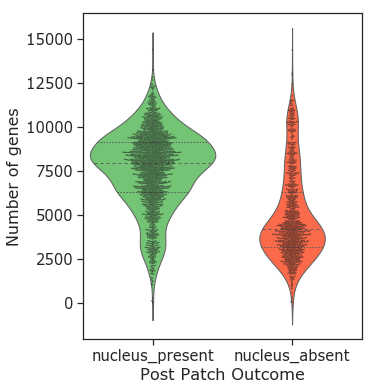

In [15]:
vioplt("percent_cdna_longer_than_400bp", "cDNA quality (%>400 bp)", met_df[met_df.percent_cdna_longer_than_400bp <= 1])
vioplt("amplified_quantity_ng", "Amplified content (ng)", met_df[met_df.amplified_quantity_ng <= 100])
vioplt("Genes.Detected.CPM", "Number of genes", met_df)

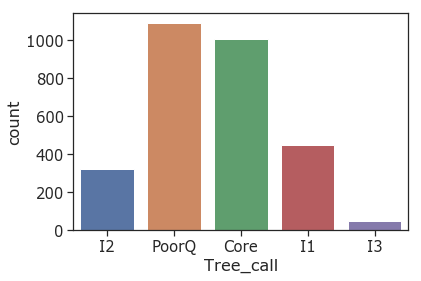

In [16]:
sns.countplot(x="Tree_call", data=met_df)